['linear', 3, 7, 3]
0.5894444444444444
['poly', 1, 'scale', 1]
0.5905555555555555
['rbf', 3, 5, 6]
0.31333333333333335
['rbf', 3, 5, 7]
0.31333333333333335
['linear', 1, 4, 5]
0.59
['rbf', 2, 'scale', 6]
0.6694444444444444
['linear', 7, 6, 4]
0.5888888888888889
['linear', 5, 7, 1]
0.5888888888888889
['poly', 3, 'auto', 6]
0.4577777777777778
['linear', 1, 'auto', 7]
0.59
['poly', 3, 'scale', 4]
0.4816666666666667
['poly', 1, 'scale', 2]
0.48444444444444446
['poly', 2, 'auto', 2]
0.4872222222222222
['rbf', 2, 1, 4]
0.6194444444444445
['sigmoid', 6, 5, 3]
0.31
['sigmoid', 4, 'scale', 4]
0.40055555555555555
['rbf', 2, 'scale', 3]
0.6694444444444444
['poly', 3, 'scale', 4]
0.4816666666666667
['linear', 3, 7, 7]
0.5894444444444444
['rbf', 1, 2, 3]
0.56
['poly', 6, 'auto', 7]
0.5211111111111111
['linear', 4, 'auto', 7]
0.5894444444444444
['sigmoid', 4, 1, 3]
0.32222222222222224
['rbf', 5, 4, 4]
0.5111111111111111
['sigmoid', 7, 6, 6]
0.3233333333333333
['rbf', 1, 1, 2]
0.6188888888888889
['rb

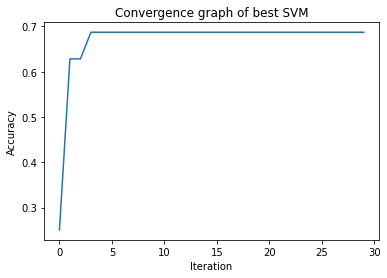

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


kernalList = ['linear', 'poly', 'rbf', 'sigmoid']
bestAccuracy = 0


cvgs_data = []
all_samples = []


df = pd.read_csv('dataset2.csv')


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


def get_accuracy(X_train, y_train, X_test, y_test, params):
    print(params)
    c = SVC(kernel=params[0], C=params[1], gamma=params[2], degree=params[3])
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    return accuracy_score(y_test, y_pred)


def sample(X, y, iter=100):
    global bestAccuracy
    sample_bestAccuracy = 0
    sample_bestGamma = 0  
    sample_bestKernel = ''
    sample_bestC = 0
    sample_bestDegree = 0  
    sample_cvgs_data = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    for _ in range(iter):
        kernel = r.choice(kernalList)
        c = r.randint(1, 7)
        g = r.randint(-1, 7)
        p = r.randint(1, 7)
        if (g < 1):
            g = r.choice(['scale', 'auto'])
        if (kernel == 'poly'):
            g = r.choice(['scale', 'auto'])

        accu = get_accuracy(X_train, y_train, X_test,
                            y_test, [kernel, c, g, p])

        print(accu)

        if (accu > sample_bestAccuracy):
            sample_bestAccuracy = accu
            sample_bestC = c
            sample_bestDegree = p
            sample_bestKernel = kernel
            sample_bestGamma = g

        sample_cvgs_data.append(sample_bestAccuracy)

    all_samples.append([sample_bestKernel, sample_bestC,
                       sample_bestGamma, sample_bestDegree, sample_bestAccuracy])
    print("**********")
    if (sample_bestAccuracy > bestAccuracy):
        global cvgs_data
        cvgs_data = sample_cvgs_data
        bestAccuracy = sample_bestAccuracy


for _ in range(10):
    sample(X, y, 30)

all_samples = pd.DataFrame(all_samples, columns=[
                           'Kernel', 'c', 'gamma', 'degree', 'Accuracy'])
print(all_samples)


all_samples.to_csv('./result.csv', index=False)
all_samples.to_markdown('./result.md', index=False)

plt.plot(np.arange(len(cvgs_data)), cvgs_data)
plt.title('Convergence graph of best SVM')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()